In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data
from skimage import transform as tf

In [2]:
ir=data.camera()
irm=(ir-ir.mean())/ir.max()

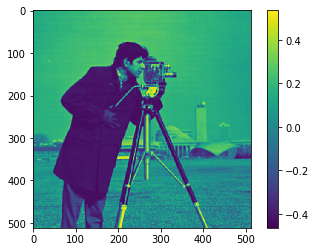

In [3]:
plt.imshow(irm)
plt.colorbar()

In [17]:
dirm=np.diff(irm,axis=0)

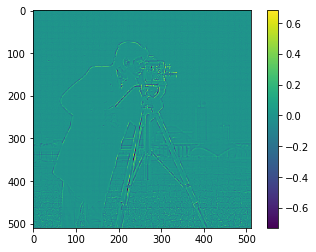

In [24]:
plt.imshow(np.diff(irm,n=2,axis=0)[:,:-2]+np.diff(irm,n=2,axis=1)[:-2,:])
plt.colorbar()

In [173]:
TP=np.array([1.,0.5,0,0,1,0,0,0,1])
iw=tf.warp(ir,TP.reshape(3,3))
iwm=iw-iw.mean()

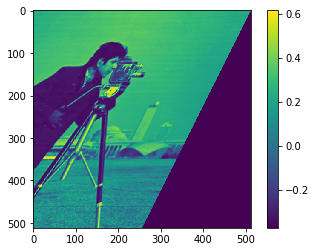

In [174]:
plt.imshow(iwm)
plt.colorbar()

In [110]:
P0=np.array([[1,0.1,0.3],[0,1,0.3],[0.2,0.1,1]])

In [113]:
from scipy.optimize import minimize

In [183]:
def fit(P):
    P=P.reshape(3,3)
    d=(iw-tf.warp(ir,P))**2
    return np.linalg.norm(d)

In [184]:
P0=np.array([1,0.1,0.3,0,1,0.3,0.2,0.1,1])

In [185]:
fit(TP)

0.0

In [195]:
bnds=[(0,1)]*9
M=100.
for i in range(10):
    sol=minimize(fit,np.random.rand(1,9),bounds=bnds,jac=True,method='Newton-CG')
    if sol.fun<M:
        print i,sol.fun
        M=sol.fun
        solx=sol.x

IndexError: invalid index to scalar variable.

In [192]:
fit(solx)

37.625139374994227

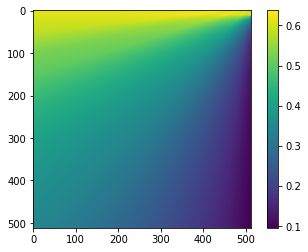

In [190]:
plt.imshow(tf.warp(ir,solx.reshape(3,3)))#sol.x.reshape(3,3)))
plt.colorbar()

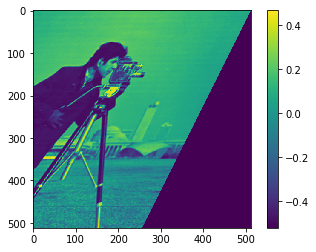

In [148]:
plt.imshow((iwm-tf.warp(irm,sol.x.reshape(3,3))))
plt.colorbar()

In [77]:
Nirm=np.linalg.norm(irm)
Niwm=np.linalg.norm(iwm)

In [78]:
ECC=np.linalg.norm(irm/Nirm-iwm/Niwm)
ECC2=ECC**2
print ECC2

1.4137278346
